In [1]:
import requests 

r = requests.get(url = "http://safai.grubx.in/bins", params={})
data = r.json()
#print(data)


[{'_id': '5bdda78c26e9e2422a621ba9', '__v': 0, 'lon': '75.81557235146984', 'lat': '26.859196881332622'}, {'_id': '5bdda78c26e9e2422a621baa', '__v': 0, 'lon': '75.84964910086123', 'lat': '26.960881529970127'}, {'_id': '5bdda78c26e9e2422a621bab', '__v': 0, 'lon': '75.84697371071395', 'lat': '26.941663377681277'}, {'_id': '5bdda78c26e9e2422a621bac', '__v': 0, 'lon': '75.70510359443037', 'lat': '26.941783461572413'}, {'_id': '5bdda78d26e9e2422a621bad', '__v': 0, 'lon': '75.78182078996072', 'lat': '26.892797543697608'}, {'_id': '5bdda78d26e9e2422a621bae', '__v': 0, 'lon': '75.8404907602227', 'lat': '26.81935316618422'}, {'_id': '5bdda78d26e9e2422a621baf', '__v': 0, 'lon': '75.84467805910438', 'lat': '26.916162755313156'}, {'_id': '5bdda78d26e9e2422a621bb0', '__v': 0, 'lon': '75.82424621194073', 'lat': '26.93771737124791'}, {'_id': '5bdda78d26e9e2422a621bb1', '__v': 0, 'lon': '75.7714065248934', 'lat': '26.947053960393376'}, {'_id': '5bdda78d26e9e2422a621bb2', '__v': 0, 'lon': '75.8754996480

In [2]:
import numpy as np
dataset = []
for i in range(0, len(data)):
    #print(data[i])
    dataset.append([data[i]['lat'], data[i]['lon']])
dataset = np.array(dataset)

{'_id': '5bdda78c26e9e2422a621ba9', '__v': 0, 'lon': '75.81557235146984', 'lat': '26.859196881332622'}
{'_id': '5bdda78c26e9e2422a621baa', '__v': 0, 'lon': '75.84964910086123', 'lat': '26.960881529970127'}
{'_id': '5bdda78c26e9e2422a621bab', '__v': 0, 'lon': '75.84697371071395', 'lat': '26.941663377681277'}
{'_id': '5bdda78c26e9e2422a621bac', '__v': 0, 'lon': '75.70510359443037', 'lat': '26.941783461572413'}
{'_id': '5bdda78d26e9e2422a621bad', '__v': 0, 'lon': '75.78182078996072', 'lat': '26.892797543697608'}
{'_id': '5bdda78d26e9e2422a621bae', '__v': 0, 'lon': '75.8404907602227', 'lat': '26.81935316618422'}
{'_id': '5bdda78d26e9e2422a621baf', '__v': 0, 'lon': '75.84467805910438', 'lat': '26.916162755313156'}
{'_id': '5bdda78d26e9e2422a621bb0', '__v': 0, 'lon': '75.82424621194073', 'lat': '26.93771737124791'}
{'_id': '5bdda78d26e9e2422a621bb1', '__v': 0, 'lon': '75.7714065248934', 'lat': '26.947053960393376'}
{'_id': '5bdda78d26e9e2422a621bb2', '__v': 0, 'lon': '75.87549964800115', 'la

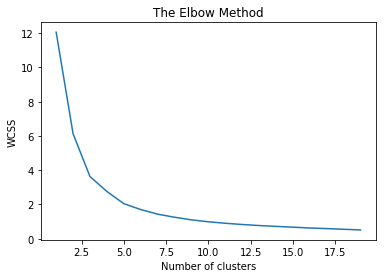

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
num = 17
kmeans = KMeans(n_clusters = num, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset)

In [28]:
def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    
    return [(int(i[:2], 16), int(i[2:4], 16), int(i[4:], 16)) for i in colors]

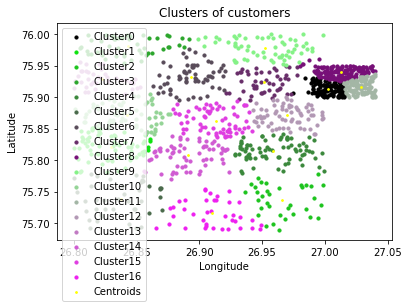

In [29]:
colors = get_spaced_colors(num)
for i in range(0, num):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 10, c = np.divide(colors[i], 255.0), label = 'Cluster' + str(i))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 3, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [38]:
for i in range(X.size):
    print(dataset[i][0], dataset[i][1], y_kmeans[i])
    response=requests.post('http://localhost:5000/addCluster', data={"lat": dataset[i][0], "lon":dataset[i][1], "cluster": y_kmeans[i]})
    print(response.text)

26.859196881332622 75.81557235146984 1
updated
26.960881529970127 75.84964910086123 12
updated
26.941663377681277 75.84697371071395 15
updated
26.941783461572413 75.70510359443037 16
updated
26.892797543697608 75.78182078996072 14
updated
26.81935316618422 75.8404907602227 1
updated
26.916162755313156 75.84467805910438 15
updated
26.93771737124791 75.82424621194073 4
updated
26.947053960393376 75.7714065248934 2
updated
26.839169846497008 75.87549964800115 10
updated
26.887378911156517 75.84899144892839 15
updated
26.96446934826075 75.71283446846653 2
updated
26.811890393277142 75.87844165787429 10
updated
26.878004967118844 75.77829104903608 14
updated
26.864522333167592 75.86807989231166 10
updated
26.89964716599503 75.8355498423291 14
updated
26.805305664085328 75.78192239416302 1
updated
26.966579950064066 75.78326131557668 4
updated
26.904679585326203 75.79283151797172 14
updated
26.844068723535138 75.69851534862374 5
updated
26.910369406628103 75.82708615706231 14
updated
26.9402

updated
26.892921192706726 75.79939703235134 14
updated
26.946977028836503 75.71384993273192 2
updated
26.888815038152458 75.79130650514509 14
updated
26.907329904751638 75.81806872402854 14
updated
26.818221139297904 75.88672609631378 10
updated
26.838293917347993 75.75863329681304 5
updated
26.960527875859505 75.87445473798824 12
updated
26.95558330350441 75.74682843169967 2
updated
26.8701507470618 75.72123111962692 5
updated
26.965291143293534 75.83659734252024 4
updated
26.822585160320653 75.7119912115846 5
updated
26.844933098043843 75.80627448666247 1
updated
26.923308735950325 75.84919732372882 15
updated
26.8303951747463 75.79821406107737 1
updated
26.944995036017637 75.86044408975503 12
updated
26.90029261960442 75.84736338746096 15
updated
26.859782242417502 75.86630175656494 10
updated
26.83572572241263 75.80568275006912 1
updated
26.836069543116473 75.82413417519382 1
updated
26.932380275775476 75.71021978106197 16
updated
26.82909413664033 75.8643153190937 10
updated
26.8

updated
26.88159560790376 75.90075222581538 6
updated
26.902400196802926 75.85351762205136 15
updated
26.904479069258485 75.8685781953658 15
updated
26.906440633284845 75.92697330857521 6
updated
26.92825783402827 75.80790460012723 4
updated
26.84052546354648 75.90502057709294 13
updated
26.84691920497081 75.92203383126291 13
updated
26.964216582374238 75.83421724242287 4
updated
26.85000424081451 75.91496287577462 13
updated
26.86251804824538 75.89000276790242 10
updated
26.848569864803757 75.92854351010975 13
updated
26.917618222726443 75.94699776856446 6
updated
26.98496342401986 75.98640430416596 9
updated
26.903933059981963 75.82276199960674 14
updated
26.884154178038205 75.92871460181065 6
updated
26.903461246918933 75.86975878496966 15
updated
26.84493289832964 75.80064129533645 1
updated
26.95118048282523 75.96353407958368 9
updated
26.80487940445907 75.97769581590752 3
updated
26.970054794026552 75.89769141048781 12
updated
26.982676499428784 75.98145889043772 9
updated
26.861

updated
26.97760240547507 75.93485455114735 7
updated
26.94294813680309 75.97236875719128 9
updated
26.934319486829402 75.84414883165176 15
updated
26.97682625514903 75.98314184582779 9
updated
26.946816473587656 75.85418816965147 12
updated
26.85865296730923 75.8926694018279 10
updated
26.969040278600815 75.96734615392307 9
updated
26.806054112110527 75.9793395503959 3
updated
26.98720950930493 75.81483657341622 4
updated
26.9659648666512 75.96662561604562 9
updated
26.966645093562544 75.89124907105483 12
updated
26.91127679529168 75.94042492739325 6
updated
26.86000724044069 75.8011947055283 14
updated
26.990057518251554 75.97804465231096 9
updated
26.997451321211663 75.81180777364321 4
updated
26.89186166569636 75.94106302047706 6
updated
26.949761569774754 75.8392250266791 4
updated
26.811576334382647 75.92906021135524 13
updated
26.86628160195576 75.99382127878168 3
updated
26.952698655776047 75.80666958320937 4
updated
26.889567536738465 75.92366230940162 6
updated
26.96441427885

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

In [39]:
colors

[(0, 0, 0),
 (14, 226, 15),
 (29, 196, 30),
 (44, 166, 45),
 (59, 136, 60),
 (74, 106, 75),
 (89, 76, 90),
 (104, 46, 105),
 (119, 16, 120),
 (133, 242, 135),
 (148, 212, 150),
 (163, 182, 165),
 (178, 152, 180),
 (193, 122, 195),
 (208, 92, 210),
 (223, 62, 225),
 (238, 32, 240)]

### 